### Loan Defaulter Prediction Using Industry Segmentation and Sentiment Analysis

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Data collection

In [3]:
# Lending Club Data
data=pd.read_csv("accepted_2007_to_2018Q4.csv")

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(2260701, 151)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [8]:
data.describe(include=['object'])

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2260701,2260668,2260668,2260668,2093699,2113761,2260668,2260668,2260668,2260668,...,10917,10917,10917,10917,10917,2260668,2260668,34246,34246,34246
unique,2260701,2,7,35,512694,11,6,3,139,9,...,3,27,28,27,5,2,2,83,3,90
top,68407277,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,...,COMPLETED,Sep-2017,Dec-2017,Sep-2017,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Jan-2019
freq,1,1609754,663557,145903,38824,748005,1111450,886231,61992,1076751,...,7819,2444,1756,1715,4770,2182546,2226422,2606,14704,1710


In [10]:
# Only the status of Full paid and charged off of borrowers are considered.
data=data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [11]:
data.shape

(1345310, 151)

In [12]:
data.dropna(how='all', inplace=True)

### Data Transformation

In [13]:
data['issue_d'].dtypes

dtype('O')

In [14]:
# Converting date columns to datetime data type
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [15]:
data['last_pymnt_d']

0          Jan-2019
1          Jun-2016
2          Jun-2017
4          Jul-2016
5          May-2017
             ...   
2260688    Aug-2018
2260690    Jul-2018
2260691    Mar-2017
2260692    Mar-2018
2260697    Oct-2017
Name: last_pymnt_d, Length: 1345310, dtype: object

In [16]:
data['last_pymnt_d']=pd.to_datetime(data['last_pymnt_d'])

In [17]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [18]:
data=data[(data['issue_d'].dt.year >= 2007) & (data['issue_d'].dt.year <= 2018)]

In [19]:
data.shape

(1345310, 151)

In [20]:
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'])

### Missing vale

In [21]:
# Count the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the total number of entries in the DataFrame
total_entries = data.shape[0]

# Calculate the percentage of missing values for each column
percentage_missing = pd.DataFrame((missing_values / total_entries) * 100, columns=['Missing_percentage'])
Missing_values_greater_than_30percent=percentage_missing[percentage_missing['Missing_percentage']> 30]
Missing_values_greater_than_30percent


,Missing_percentage
member_id,100.000000
desc,90.817730
mths_since_last_delinq,50.452535
mths_since_last_record,83.010979
next_pymnt_d,100.000000
mths_since_last_major_derog,73.704945
annual_inc_joint,98.082226
dti_joint,98.082449
verification_status_joint,98.097465
open_acc_6m,60.039173


In [22]:
Missing_values_greater_than_30percent.shape

(58, 1)

In [23]:
# Obtain the column names with missing percentage greater than 30%
columns_to_drop = Missing_values_greater_than_30percent.index

# Drop columns from the original DataFrame
data.drop(columns=columns_to_drop, inplace=True)

In [25]:
# Imputing the neccessary values for the missing values
mis_columns=list(percentage_missing[(percentage_missing['Missing_percentage'] > 0) & (percentage_missing['Missing_percentage'] < 30)].index)
def replace_missing_values(df):
    for col in mis_columns:
        if col not in ('pct_tl_nvr_dlq','emp_title'):
            if df[col].dtype in ['float64', 'int64']:  # Continuous columns
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
            elif df[col].dtype == 'object':  # Categorical columns
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
            elif df[col].dtype == 'bool':  # Boolean columns (treated as categorical)
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
            elif pd.api.types.is_datetime64_any_dtype(df[col].dtype):  # Datetime columns
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)


replace_missing_values(data)

In [26]:
data.shape

(1345310, 93)

### Outlier

In [27]:
import pandas as pd
import numpy as np

def find_numeric_outliers(df, threshold=3):
    outliers = pd.DataFrame()
    outliers_percentages = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers[col] = df[col][z_scores > threshold]
        outliers_percentages[col] = (z_scores > threshold).mean() * 100
    outliers_df = pd.DataFrame(list(outliers_percentages.items()), columns=['Column', 'Percentage of Outliers'])
    return outliers, outliers_df

# Find outliers in numeric columns
numeric_outliers, outliers_percentages = find_numeric_outliers(data)

# Print columns with outliers in numeric columns
if not numeric_outliers.empty:
    print("Numeric columns with outliers:")
    print(numeric_outliers.columns)
    print("\nPercentage of outliers in each column:")
    print(outliers_percentages)
else:
    print("No numeric columns with outliers found.")
    print("Percentage of outliers in each column: None (No outliers found)")


Numeric columns with outliers:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_t

In [28]:
outliers_percentages.min()

Column                    acc_now_delinq
Percentage of Outliers               0.0
dtype: object

In [29]:
outliers_percentages.max()

Column                    total_rev_hi_lim
Percentage of Outliers            2.713575
dtype: object

In [30]:
outliers_percentages_remove=outliers_percentages[outliers_percentages['Percentage of Outliers']> 3]

In [31]:
# Obtain the column names with missing percentage greater than 30%
columns_to_drop = outliers_percentages_remove['Column']

# Drop columns from the original DataFrame
data.drop(columns=columns_to_drop, inplace=True)

### Feature engineering

In [33]:
job_title=list(data['emp_title'].value_counts()[0:200].index)

#### Classifying industry segments

In [35]:
# Define the sectors and job titles mapping
sector_mapping = {
    "IT": ["Software Engineer", "Network Engineer", "Systems Engineer", "IT Specialist", "Systems Administrator", "Software Developer", 
           "Senior Software Engineer", "Systems Analyst", "Tech", "Project Engineer", "IT Manager", "Business Analyst", "president",
           "Analyst", "Consultant", "Program Manager", "CEO", "Executive Director", "general manager", "Marketing Manager", "Assistant Manager", 
           "VP", "Team Leader", "Senior Vice President", "Office Manager", "General Manager", "Senior Manager", "Product Manager"],
    "Education": ["Teacher", "Professor", "Instructor", "Assistant Professor", "Educator", "Principal", "Teacher "],
    "Healthcare": ["Registered Nurse", "RN", "Nurse", "LPN", "CNA", "Physician", "Pharmacist", "Medical Assistant", "Nurse Practitioner", 
                   "Respiratory Therapist", "Physician Assistant", "registered nurse"],
    "Manufacturing": ["Engineer", "Quality Control", "Mechanic", "Electrician", "Mechanical Engineer", "Civil Engineer", "Electrical Engineer", 
                      "Technician", "machine operator", "operator", "Welder", "Machinist", "Carpenter", "Production Manager", "Operations Manager",
                      "Maintenance", "Production", "Supervisor"],
    "Finance and Banking": ["Accountant", "Financial Analyst", "Accounting Manager", "Controller", "Bookkeeper", "Accounting", "Senior Accountant",
                            "CFO", "Auditor", "Banker", "Personal Banker", "Loan Officer", "Financial Advisor", "Finance Manager", "Account Executive",
                            "Account Manager", "Branch Manager"]
}

def classify_job_title(job_title):
    for sector, titles in sector_mapping.items():
        if job_title in titles:
            return sector
    return "Unknown"

# List of job titles
classify_job_title(list(data['emp_title']))

# Apply the function to create a new column 'sector'
data['sector'] = data['emp_title'].apply(classify_job_title)


In [36]:
data['sector'].value_counts()

sector
Unknown                1199079
IT                       39302
Manufacturing            29542
Healthcare               28552
Education                27417
Finance and Banking      21418
Name: count, dtype: int64

In [37]:
data.drop(data[data['sector'] == 'Unknown'].index, inplace=True)

In [38]:
data.shape

(146231, 94)

In [39]:
data.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,sector
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Manufacturing
14,68466961,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,A2,Senior Manager,...,0.0,0.0,304003.0,74920.0,41500.0,42503.0,N,Cash,N,IT
23,68436666,5000.0,5000.0,5000.0,36 months,13.44,169.54,C,C3,General Manager,...,0.0,0.0,41091.0,35653.0,4300.0,31791.0,N,Cash,N,IT
24,68476715,6000.0,6000.0,6000.0,36 months,7.49,186.61,A,A4,Analyst,...,0.0,0.0,156354.0,22741.0,3800.0,36083.0,N,Cash,N,IT
45,68587709,21000.0,21000.0,21000.0,60 months,13.44,482.56,C,C3,Teacher,...,1.0,0.0,57564.0,51489.0,5900.0,51664.0,N,Cash,N,Education


#### Merging Sentiment Scores 

In [40]:
industry_sentiment=pd.read_csv("sent_updated.csv")

In [41]:
industry_sentiment.head()

,Sector,Year,Sentiment Score,Sentiment,Content
0,IT,2018,0.70,Positive,The IT sector experiences strong growth and in...
1,IT,2017,0.60,Positive,Steady growth in the IT sector with a focus on...
2,IT,2016,0.70,Positive,"Strong demand for software developers, data sc..."
3,IT,2015,0.65,Positive,The IT sector benefits from increased investme...
4,IT,2014,0.60,Positive,Strong year for the IT sector with initiatives...


In [42]:
data[data['id']==68355089]['sector']

1    Manufacturing
Name: sector, dtype: object

In [43]:
pivot_df = industry_sentiment.pivot(index='Sector', columns='Year', values=['Sentiment Score'])

In [44]:
temp=pivot_df.reset_index()

In [45]:
temp.columns = ['_'.join(map(str, col)).strip() for col in temp.columns.values]


In [46]:
temp.columns

Index(['Sector_', 'Sentiment Score_2007', 'Sentiment Score_2008',
       'Sentiment Score_2009', 'Sentiment Score_2010', 'Sentiment Score_2011',
       'Sentiment Score_2012', 'Sentiment Score_2013', 'Sentiment Score_2014',
       'Sentiment Score_2015', 'Sentiment Score_2016', 'Sentiment Score_2017',
       'Sentiment Score_2018'],
      dtype='object')

In [47]:
merged_df = pd.merge(data, temp, left_on=['sector'],right_on=['Sector_'], how='left')

In [48]:
merged_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,Sentiment Score_2009,Sentiment Score_2010,Sentiment Score_2011,Sentiment Score_2012,Sentiment Score_2013,Sentiment Score_2014,Sentiment Score_2015,Sentiment Score_2016,Sentiment Score_2017,Sentiment Score_2018
0,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,-0.2,0.55,0.60,0.50,0.55,0.60,0.65,0.60,0.55,0.65
1,68466961,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,A2,Senior Manager,...,-0.2,0.55,0.60,0.50,0.55,0.60,0.65,0.70,0.60,0.70
2,68436666,5000.0,5000.0,5000.0,36 months,13.44,169.54,C,C3,General Manager,...,-0.2,0.55,0.60,0.50,0.55,0.60,0.65,0.70,0.60,0.70
3,68476715,6000.0,6000.0,6000.0,36 months,7.49,186.61,A,A4,Analyst,...,-0.2,0.55,0.60,0.50,0.55,0.60,0.65,0.70,0.60,0.70
4,68587709,21000.0,21000.0,21000.0,60 months,13.44,482.56,C,C3,Teacher,...,-0.2,0.60,0.65,0.55,0.60,0.65,0.70,0.65,0.60,0.70


In [49]:
merged_df[merged_df['id']==68355089]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,Sentiment Score_2009,Sentiment Score_2010,Sentiment Score_2011,Sentiment Score_2012,Sentiment Score_2013,Sentiment Score_2014,Sentiment Score_2015,Sentiment Score_2016,Sentiment Score_2017,Sentiment Score_2018
0,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,-0.2,0.55,0.6,0.5,0.55,0.6,0.65,0.6,0.55,0.65


In [50]:
data_prop=merged_df

In [51]:
data_prop['issue_year'] = data_prop['issue_d'].dt.year
data_prop['last_pymnt_year'] = data_prop['last_pymnt_d'].dt.year

# Loop through each row to update the sentiment scores
for idx, row in merged_df.iterrows():
    issue_year = row['issue_year']
    last_paybt_year = row['last_pymnt_year']
    
    # Iterate over each year and update sentiment scores outside the range to 0
    for year in range(2007, 2019):
        if year < issue_year or year > last_paybt_year:
            sentiment_col = f'Sentiment Score_{year}'
            data_prop.at[idx, sentiment_col] = 0

# Drop the temporary year columns
data_prop.drop(['issue_year', 'last_pymnt_year'], axis=1, inplace=True)

In [52]:
merged_df=data_prop

In [53]:
data = merged_df

In [54]:
data.shape

(146231, 107)

### One Hot Encoding

In [55]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [56]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

In [57]:
numerical_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_re

In [58]:
data=data.drop(['id','url','zip_code','emp_length','addr_state','earliest_cr_line','last_credit_pull_d',
             'emp_title','title','issue_d','last_pymnt_d','pct_tl_nvr_dlq','Sector_','out_prncp','out_prncp_inv','policy_code'],axis=1)
#data=data.drop(['emp_title'],axis=1)
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
encoded_cols=enc.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=enc.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame excluding object type columns
df_encoded = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [59]:
df_encoded.shape

(146231, 158)

In [60]:
# The cleaned data is saved in final_data.csv
#df_encoded.to_csv("final_data.csv",index=False)

### EDA

In [61]:
data['loan_status'].value_counts()

loan_status
1    119467
0     26764
Name: count, dtype: int64

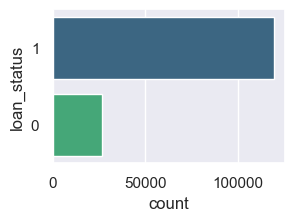

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,2))
sns.set(style="darkgrid")
ax = sns.countplot(y="loan_status", data=data, palette="viridis", order=data['loan_status'].value_counts().index)
plt.show()

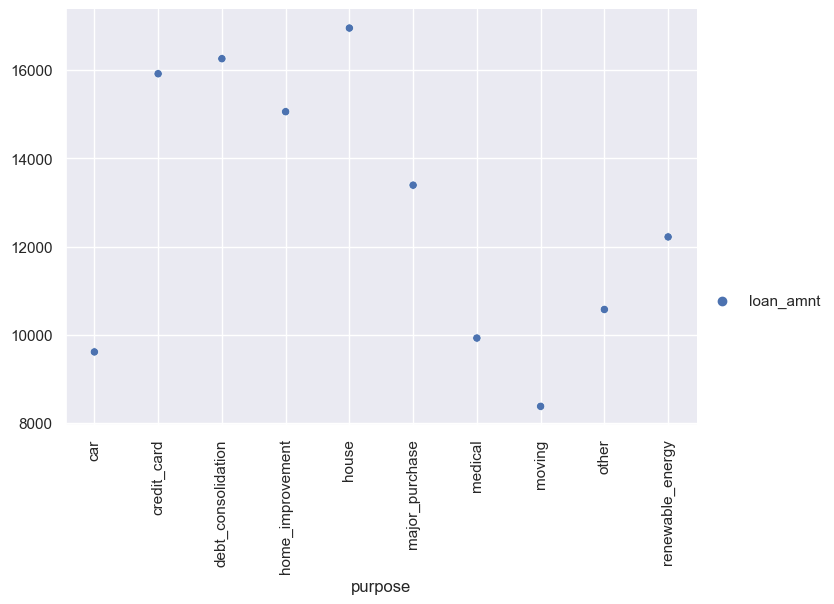

In [63]:
higher_mean_amt = data.groupby("purpose")[['loan_amnt']].mean()[0:10]

# Set the figure size directly in relplot
plot=sns.relplot(data=higher_mean_amt, height=5, aspect=1.5 )

#Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.show()

<Figure size 500x700 with 0 Axes>

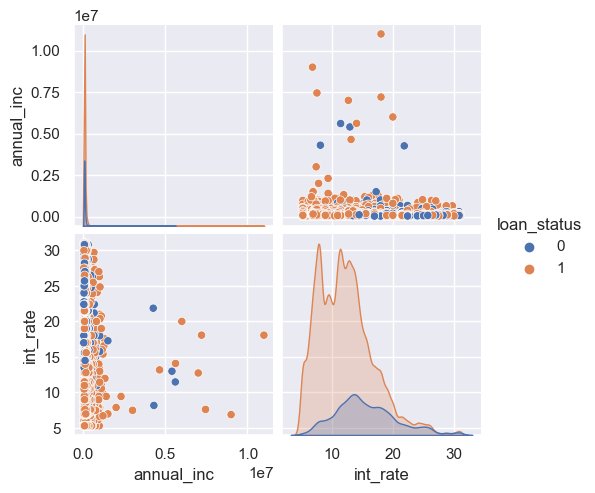

In [64]:
gradeDf = data[["annual_inc","int_rate","loan_status"]]
plt.figure(figsize=(5,7))
sns.pairplot(gradeDf, hue ="loan_status")

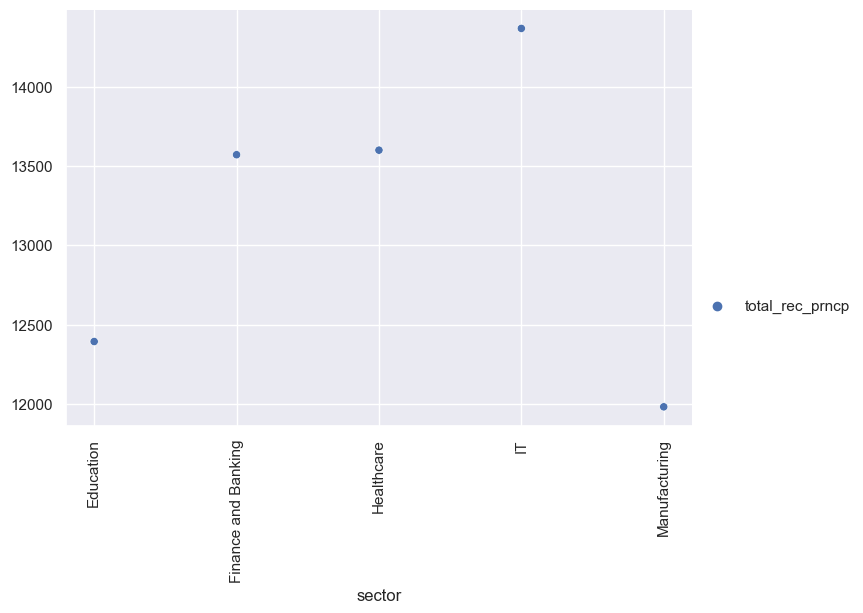

In [65]:
higher_mean_amt = data.groupby("sector")[['total_rec_prncp']].mean()

# Set the figure size directly in relplot
plot=sns.relplot(data=higher_mean_amt, height=5, aspect=1.5 )

#Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [66]:
 data.groupby(['loan_status'])[['sector']].value_counts()

loan_status  sector             
0            IT                      6666
             Manufacturing           6080
             Healthcare              5493
             Education               5001
             Finance and Banking     3524
1            IT                     32636
             Manufacturing          23462
             Healthcare             23059
             Education              22416
             Finance and Banking    17894
Name: count, dtype: int64

<Axes: ylabel='count'>

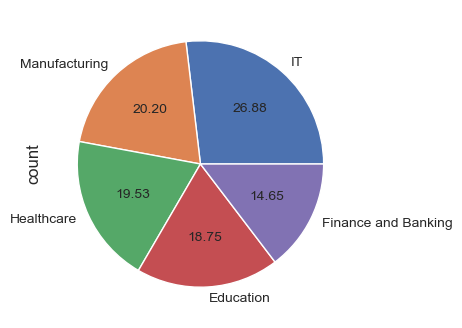

In [67]:
a=data['sector'].value_counts()
a.plot.pie(autopct='%.2f', fontsize=10, figsize=(4, 4))

In [68]:
import pandas as pd
import hvplot.pandas
numeric_columns = data.select_dtypes(include=['number'])
numeric_columns.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=800, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status)

In [69]:
data['term'] = data['term'].astype(str)
data['home_ownership'] = data['home_ownership'].astype(str)
data['verification_status'] = data['verification_status'].astype(str)
data['sector'] = data['sector'].astype(str)
data['purpose'] = data['purpose'].astype(str)
data['loan_status'] = data['loan_status'].astype(str)

[Text(0, 0, 'small_business'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'other'),
 Text(4, 0, 'vacation'),
 Text(5, 0, 'home_improvement'),
 Text(6, 0, 'major_purchase'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'car'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'house'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding')]

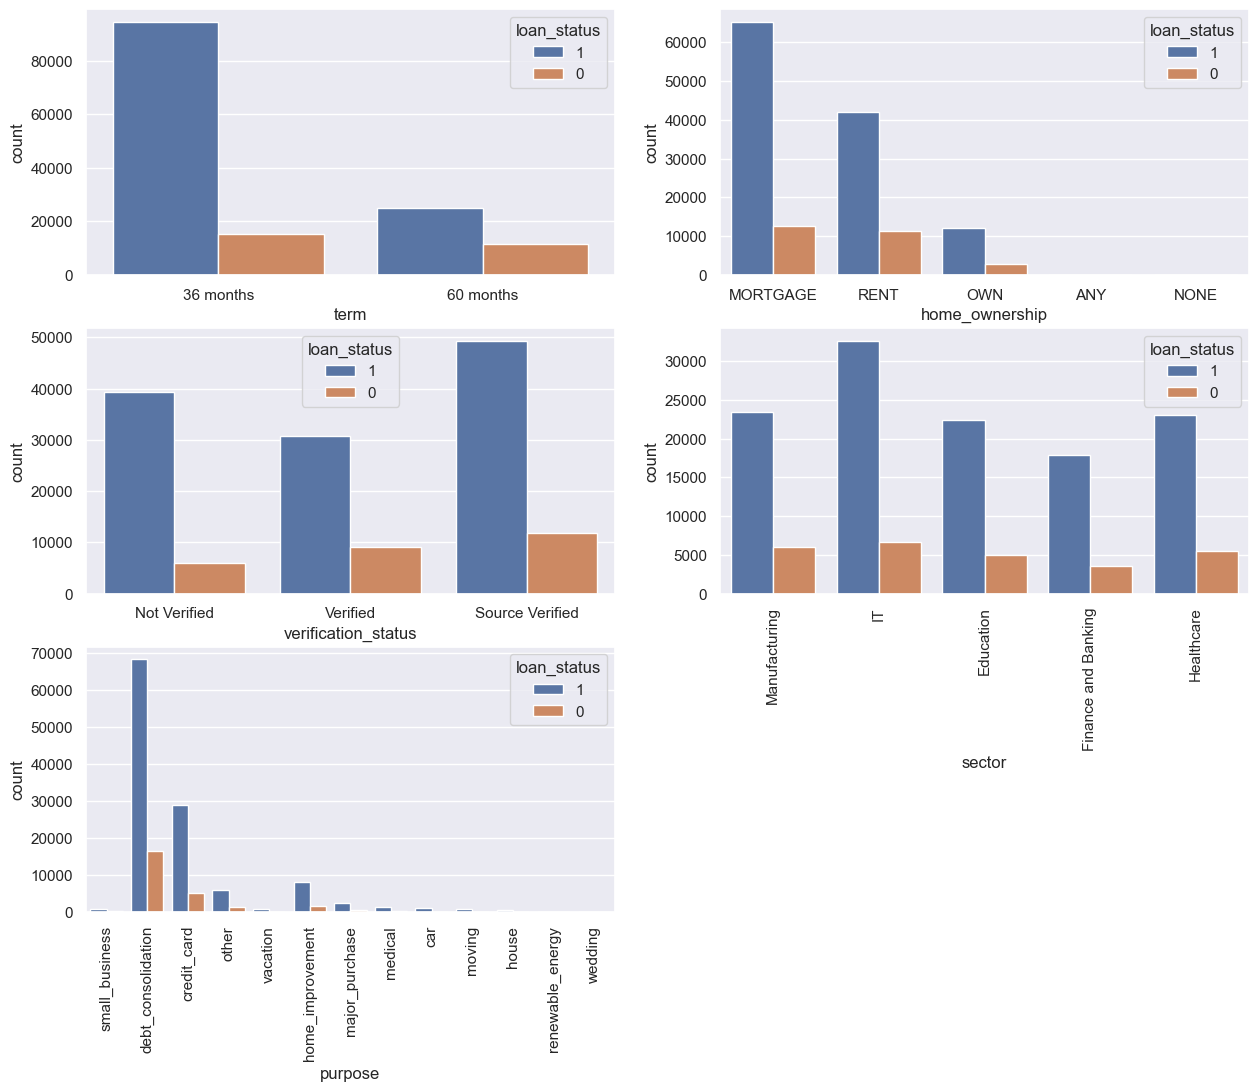

In [70]:
plt.figure(figsize=(15, 20))

plt.subplot(5, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(5, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(5, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(5, 2, 4)
g=sns.countplot(x='sector', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(5, 2, 5)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

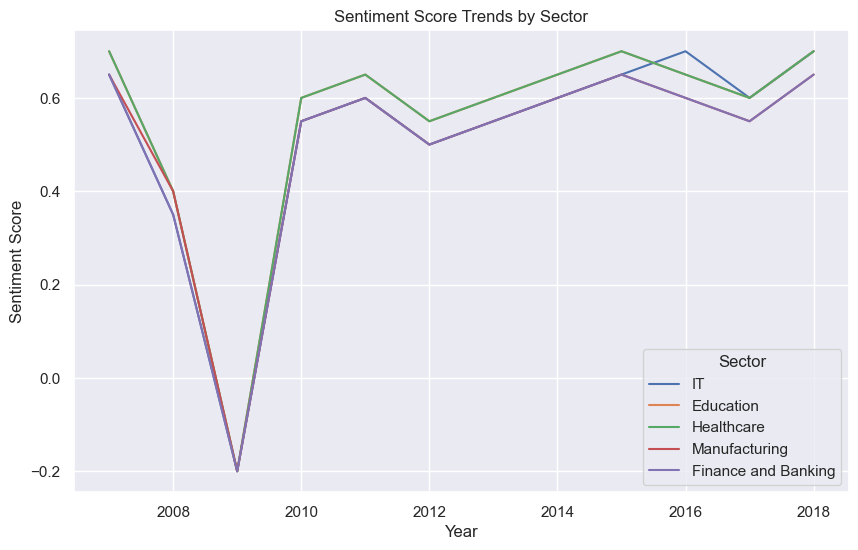

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sentiment Score', hue='Sector', data=industry_sentiment)

plt.title('Sentiment Score Trends by Sector')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.legend(title='Sector', loc='best')

plt.show()

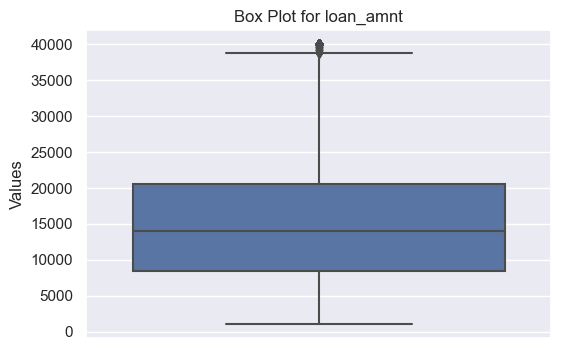

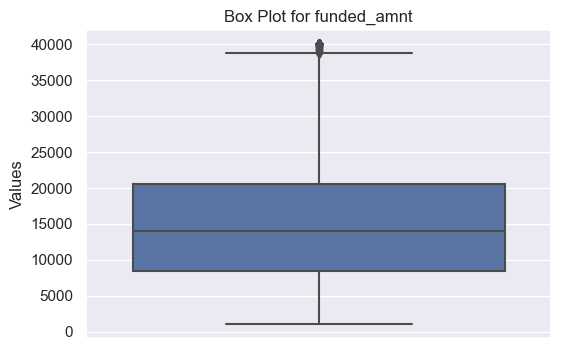

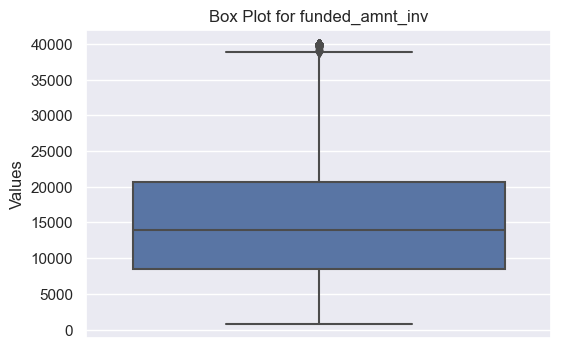

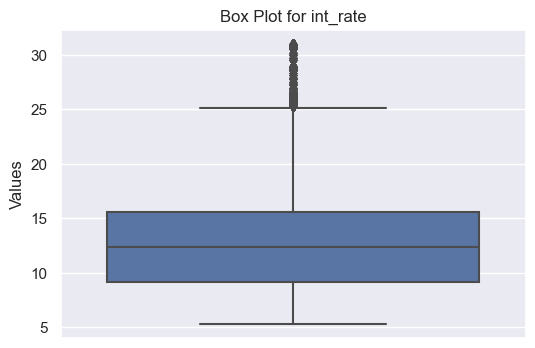

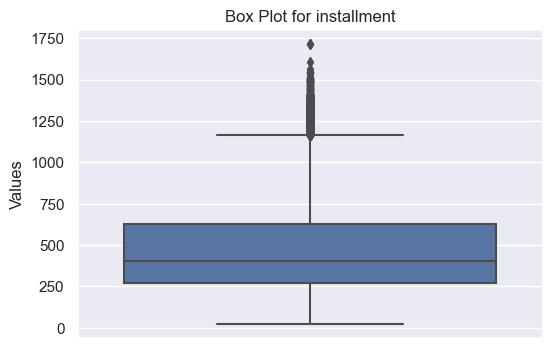

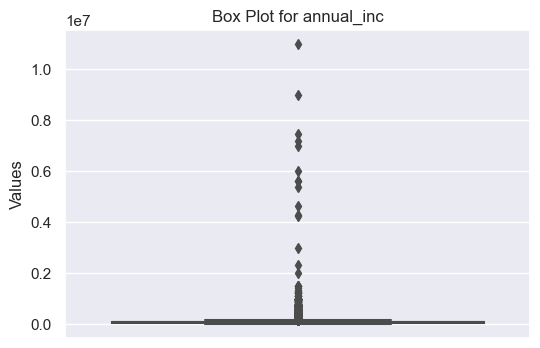

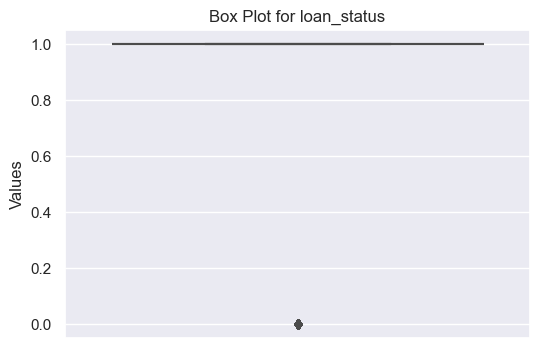

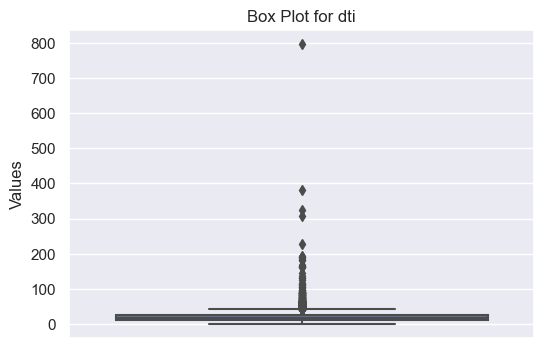

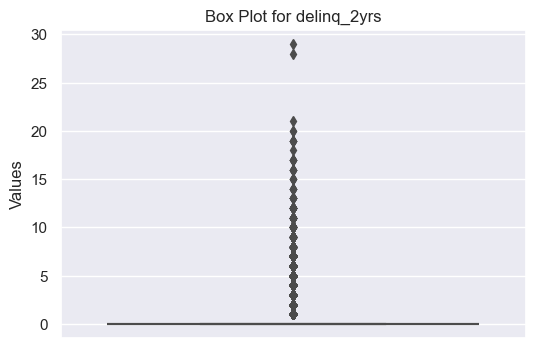

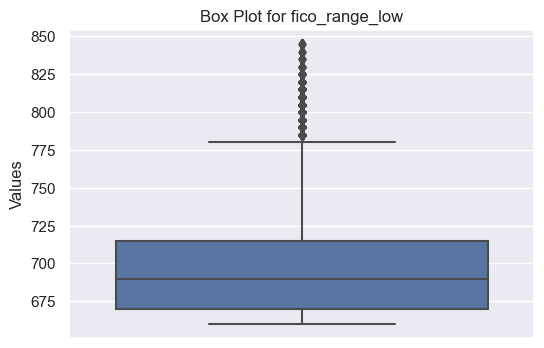

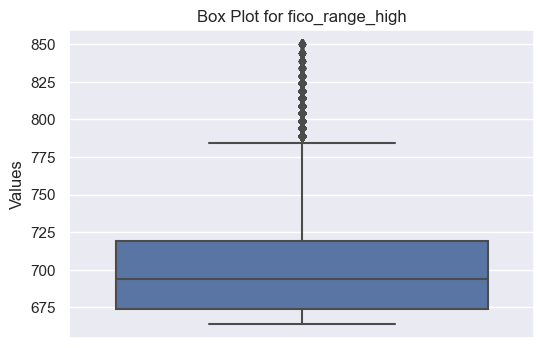

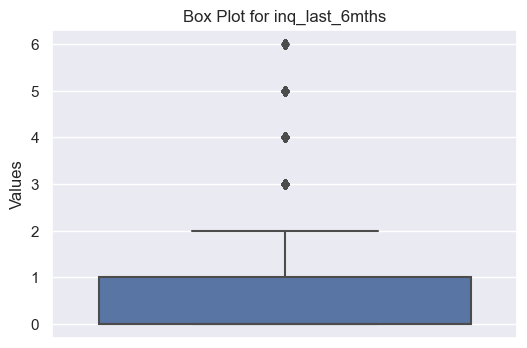

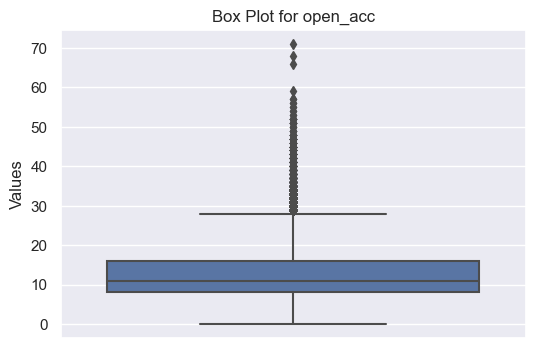

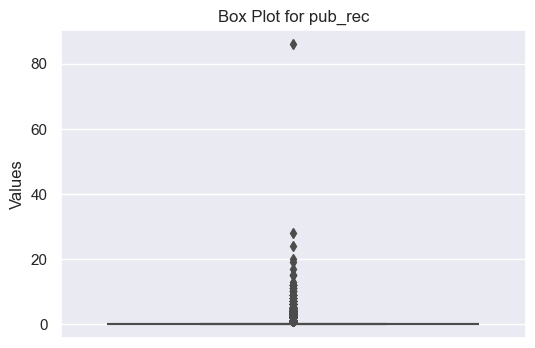

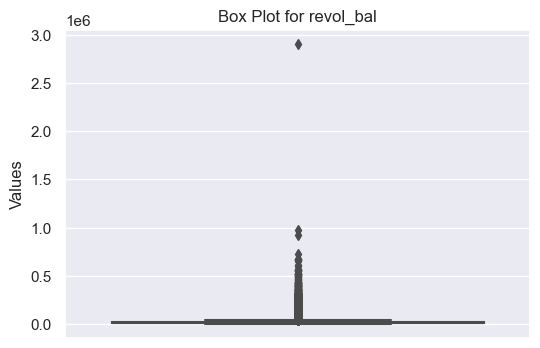

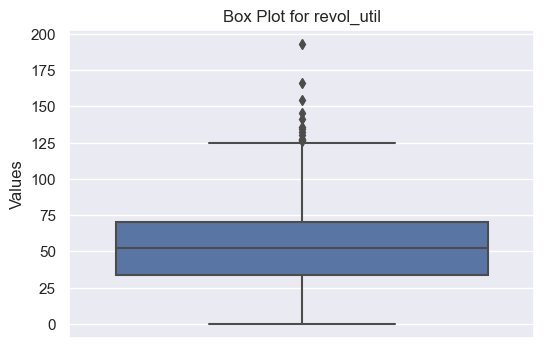

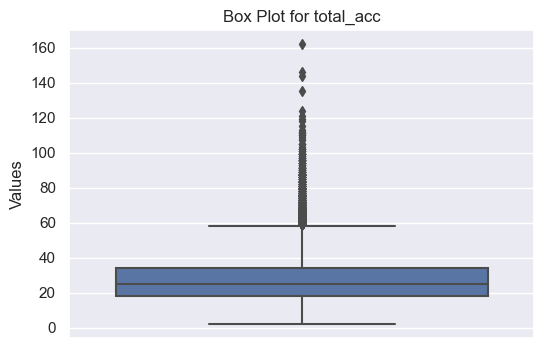

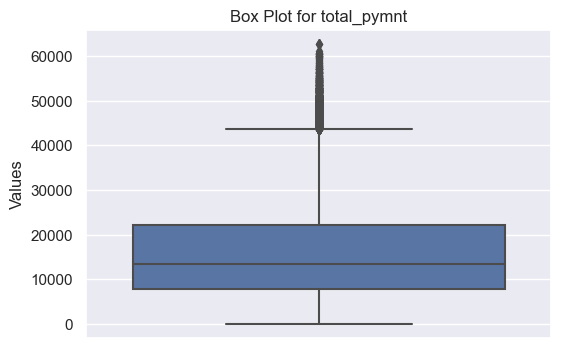

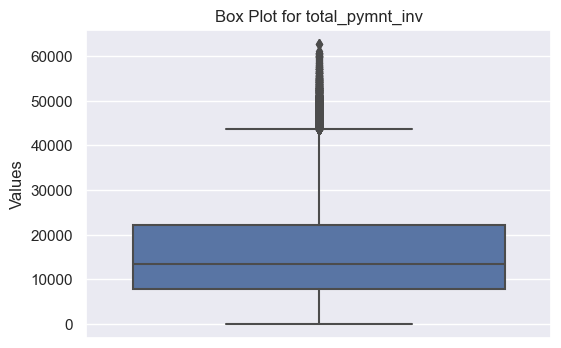

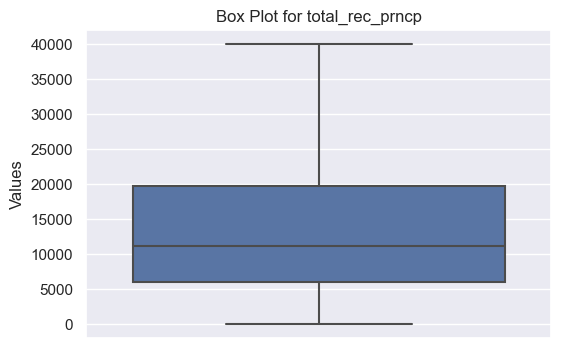

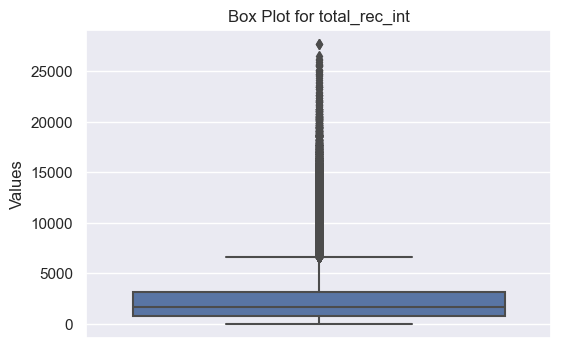

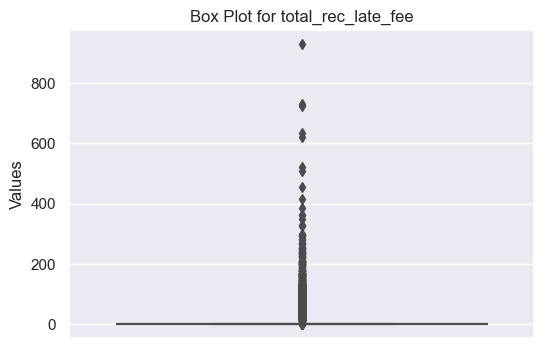

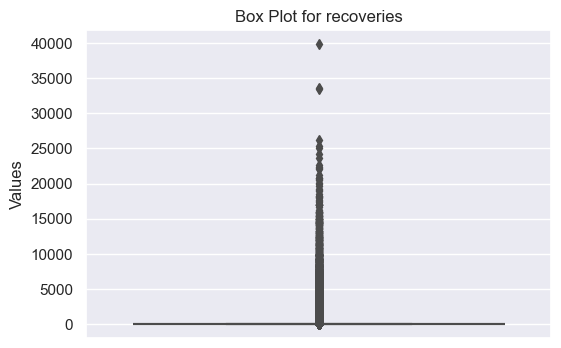

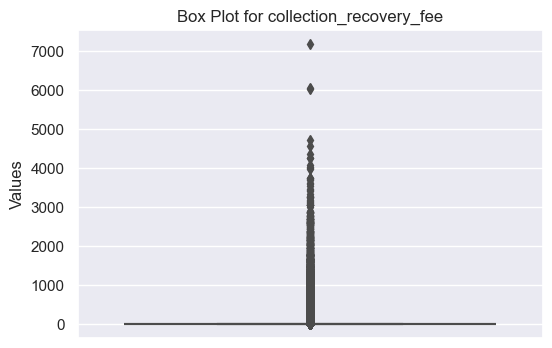

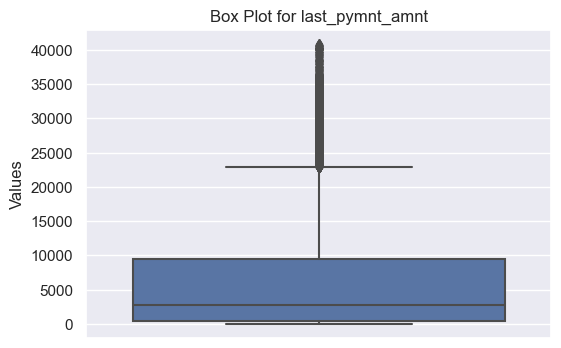

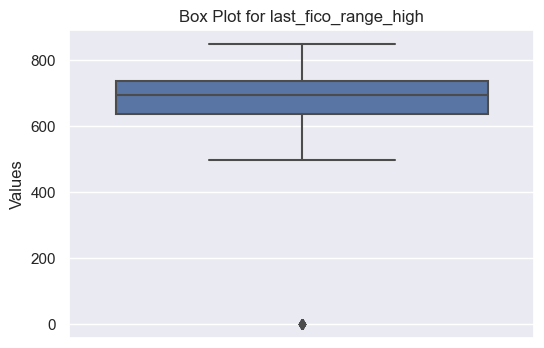

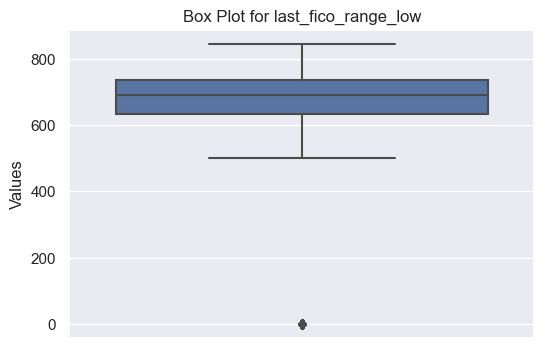

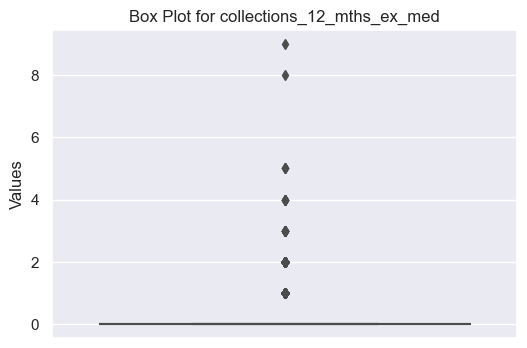

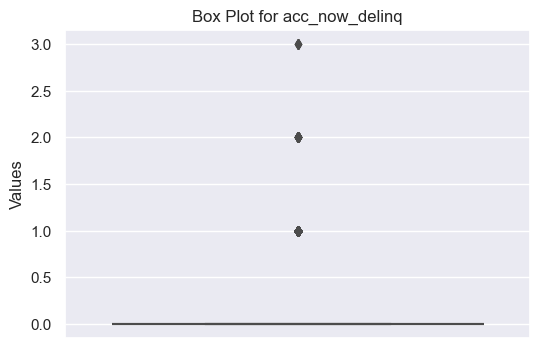

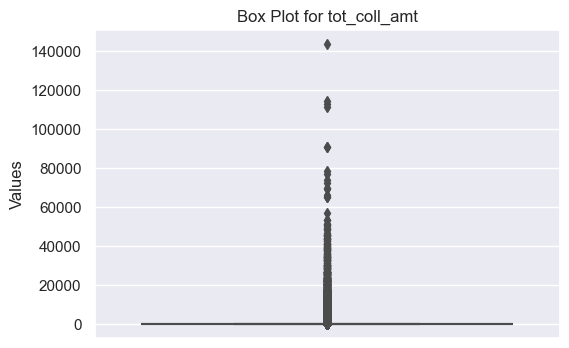

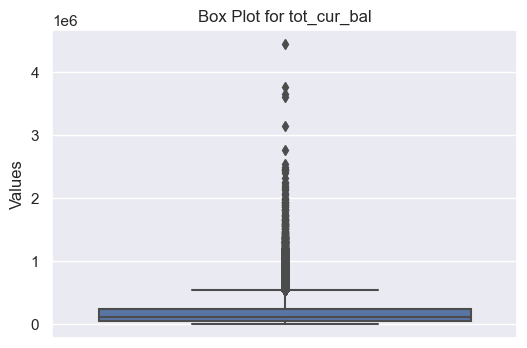

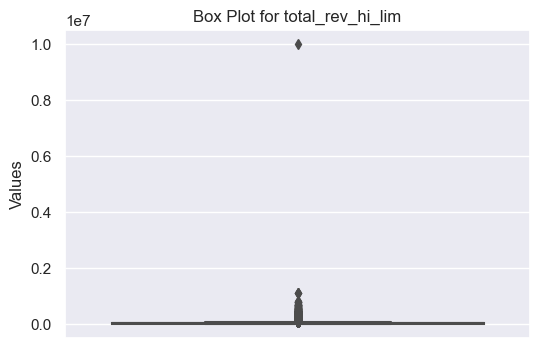

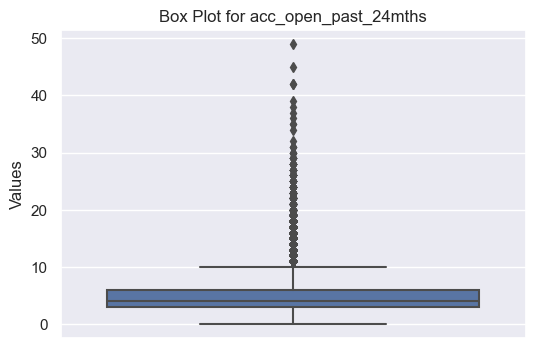

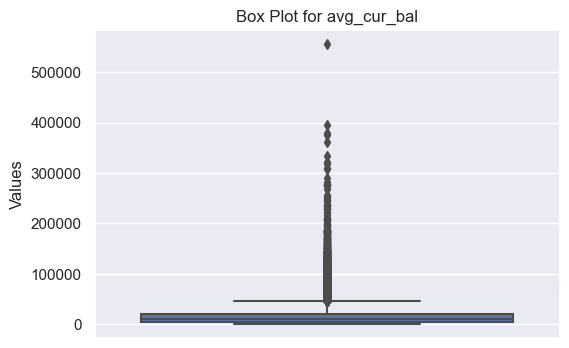

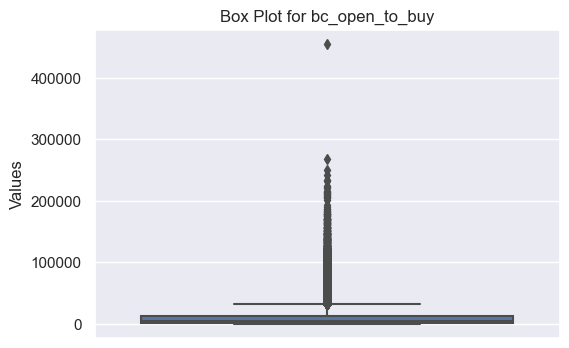

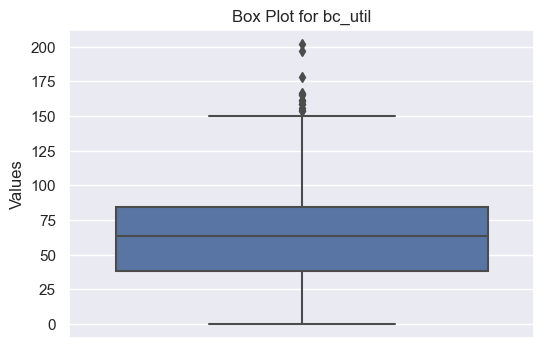

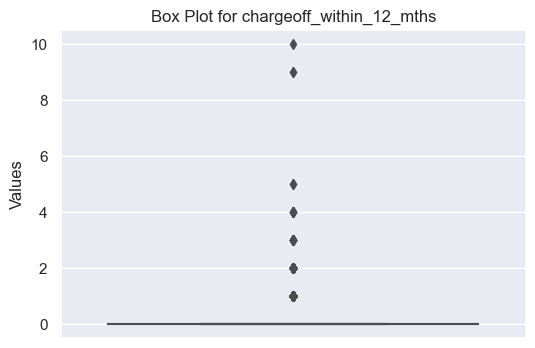

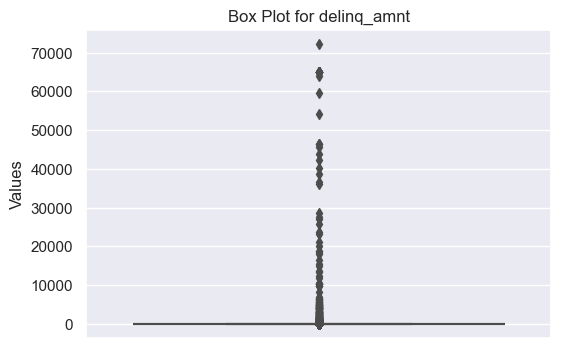

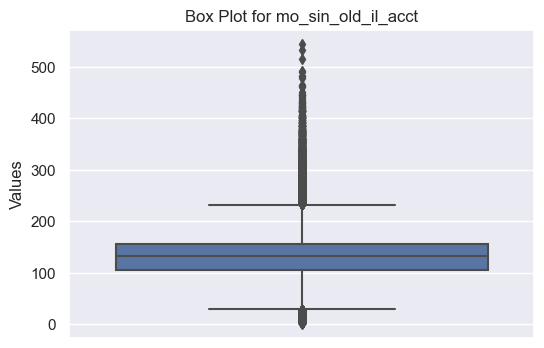

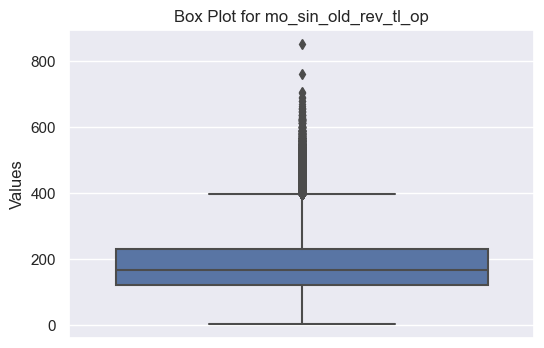

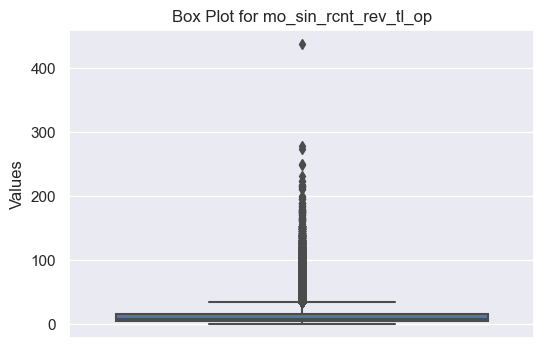

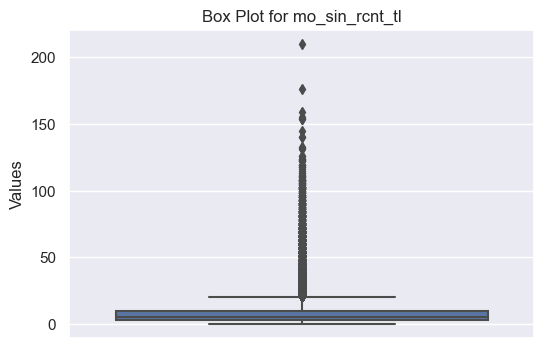

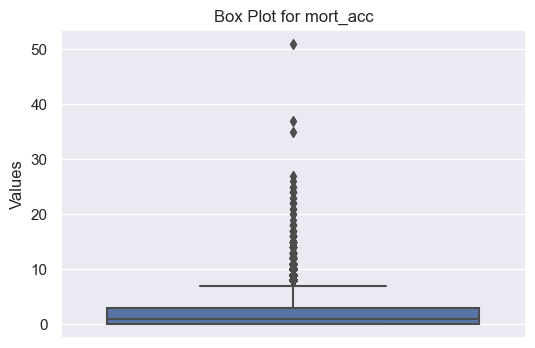

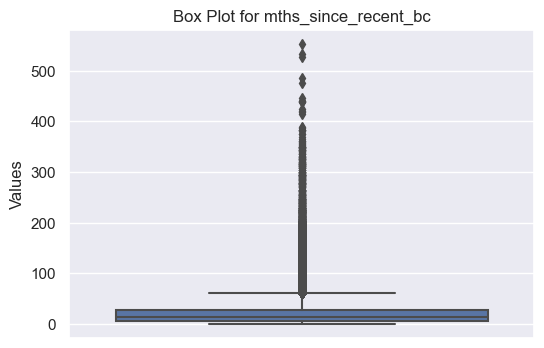

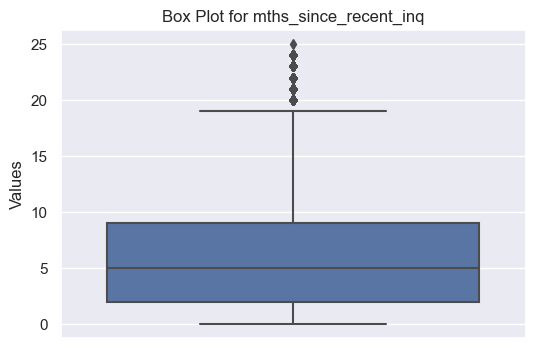

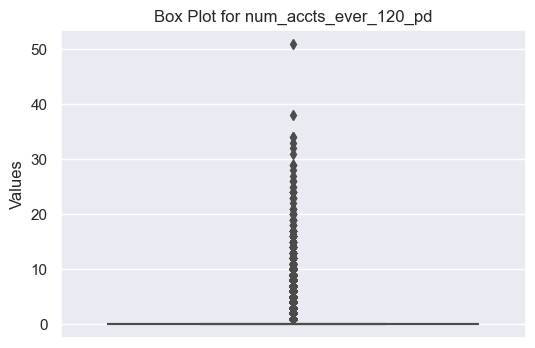

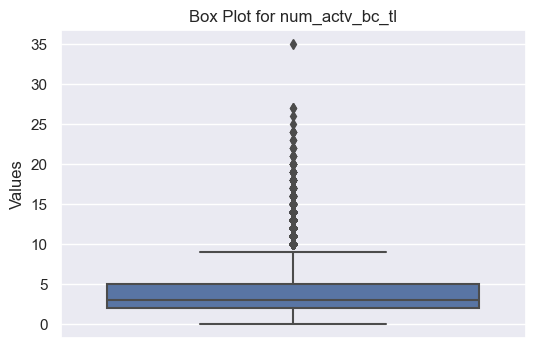

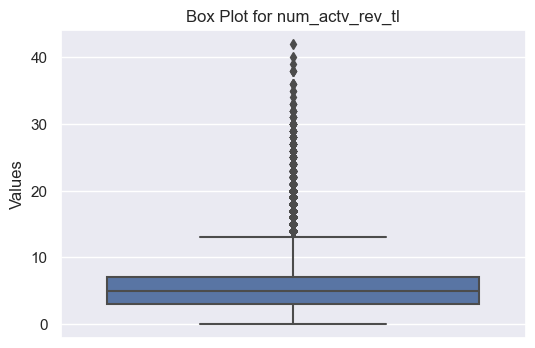

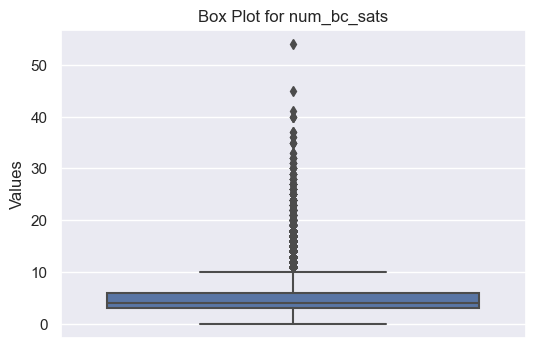

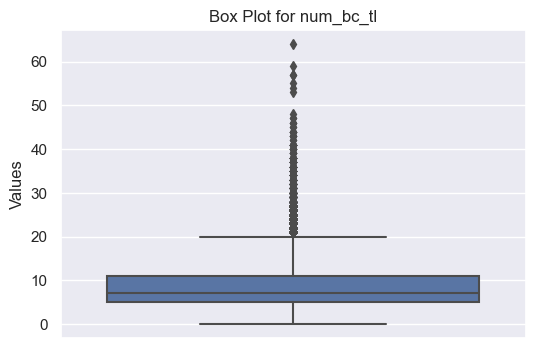

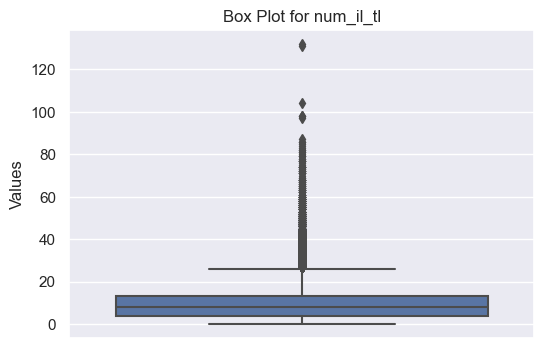

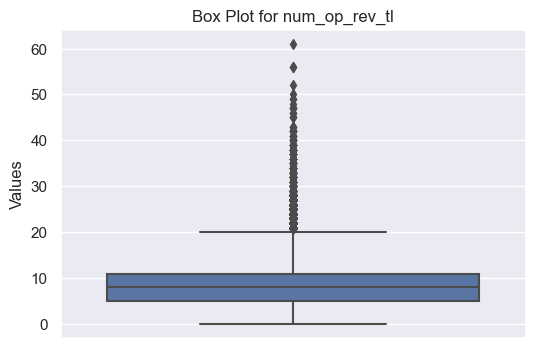

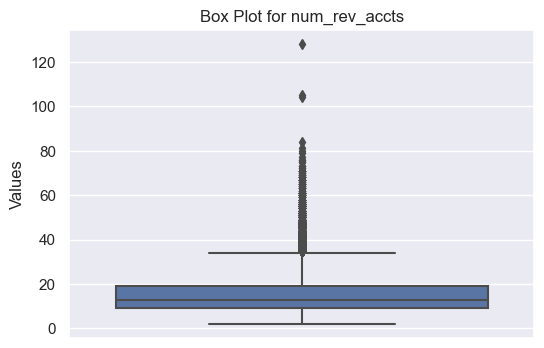

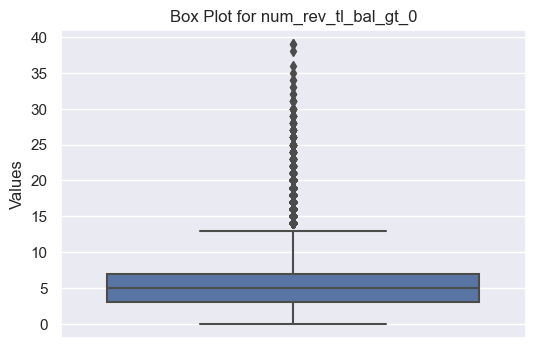

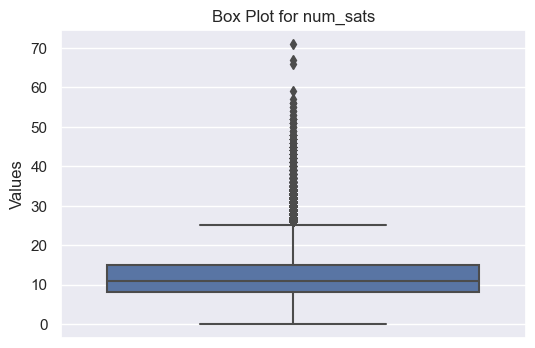

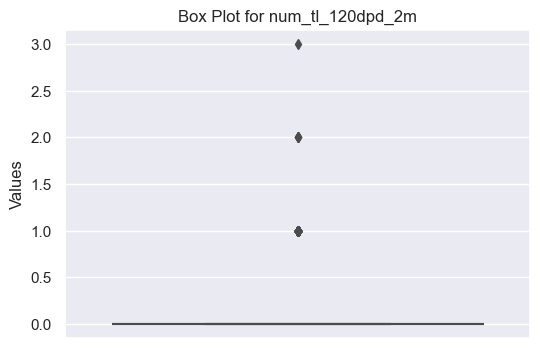

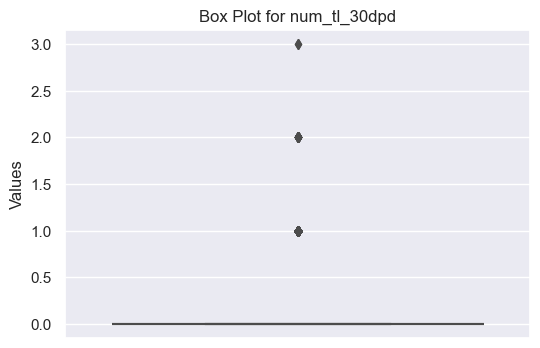

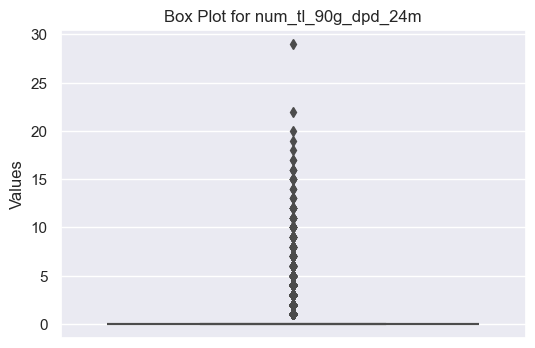

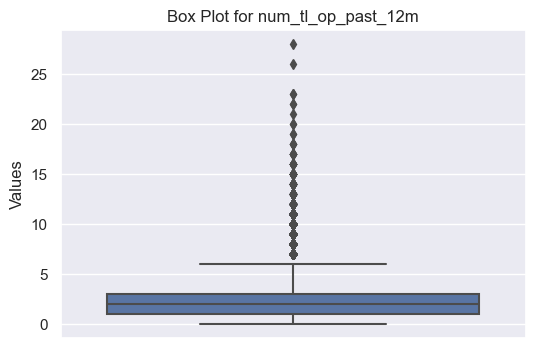

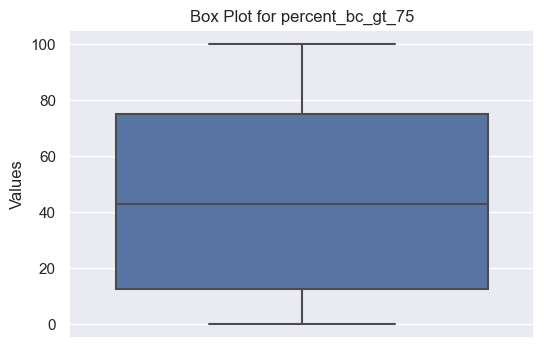

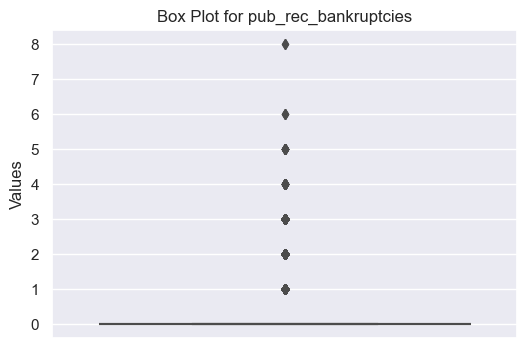

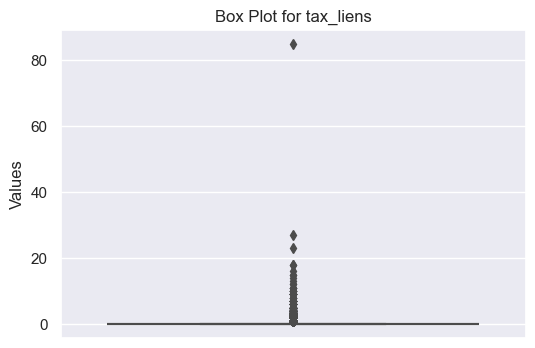

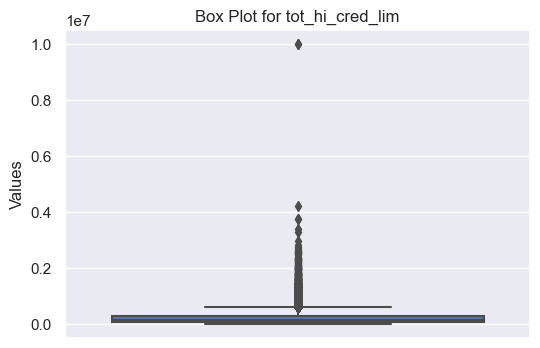

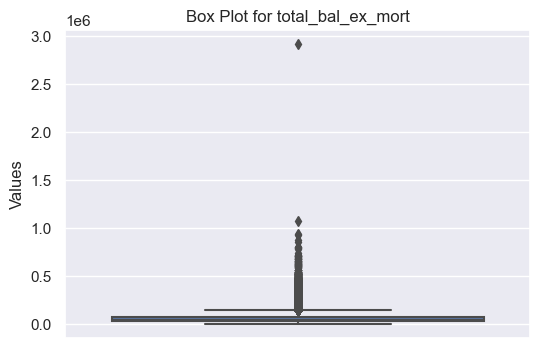

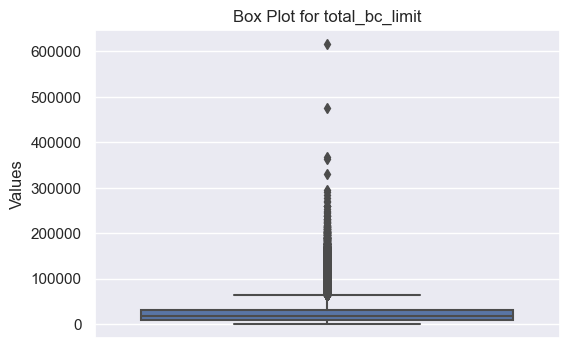

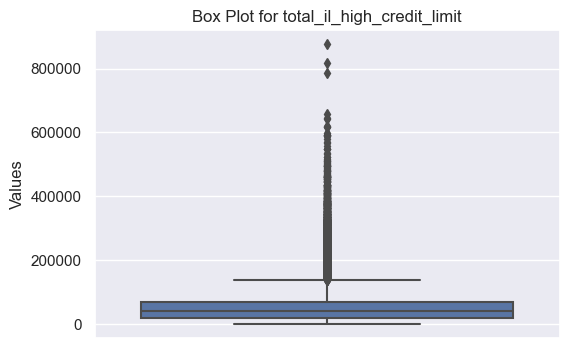

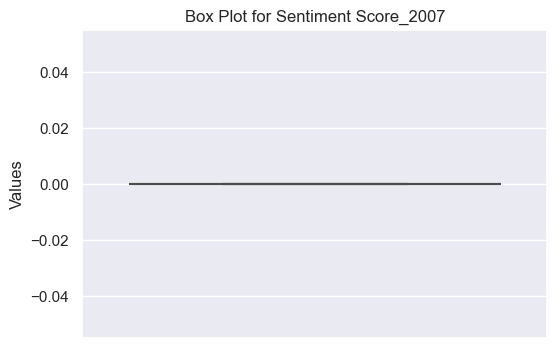

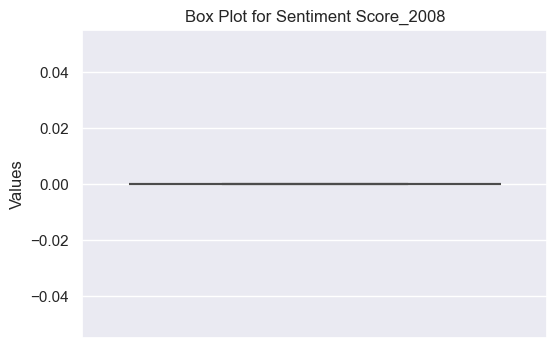

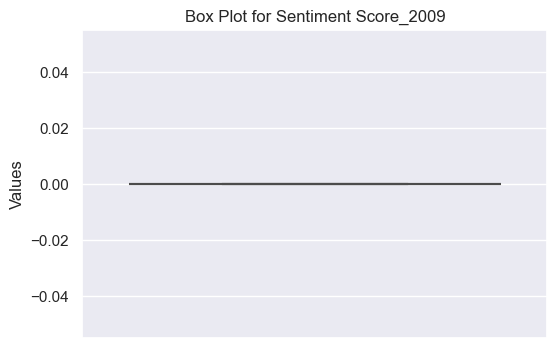

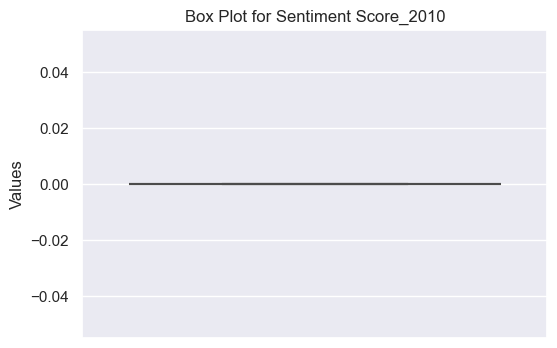

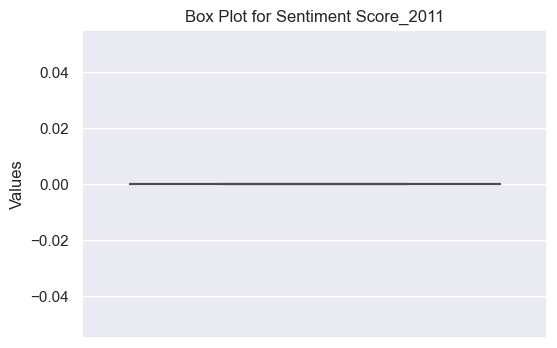

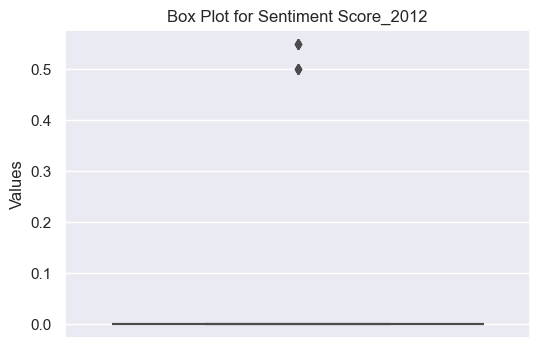

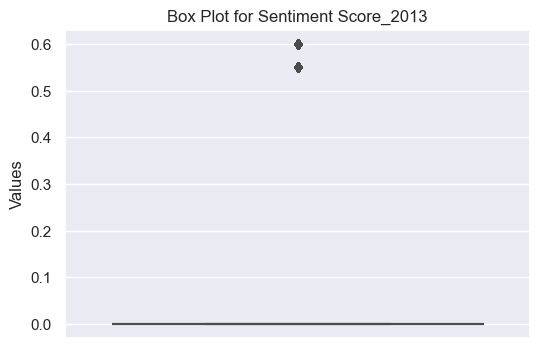

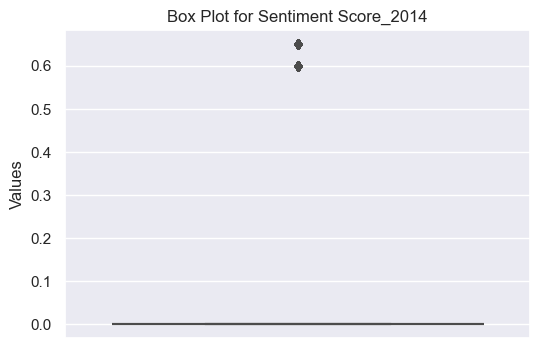

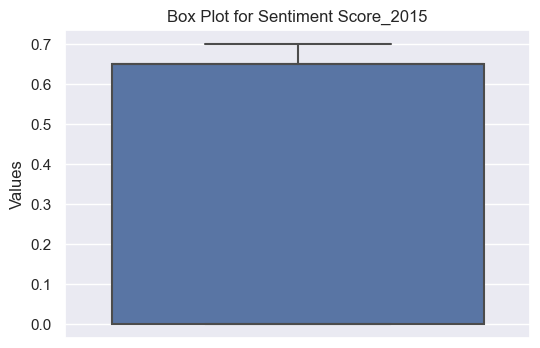

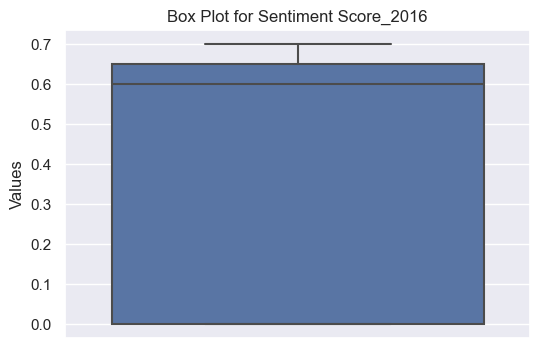

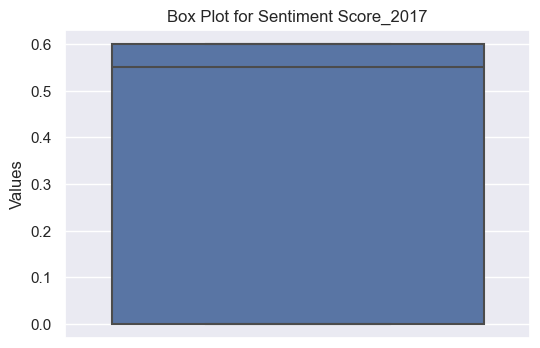

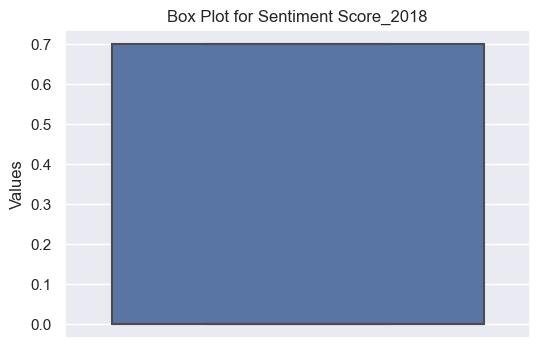

In [72]:
# Creating a box plot for each column
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=numeric_columns[column])
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

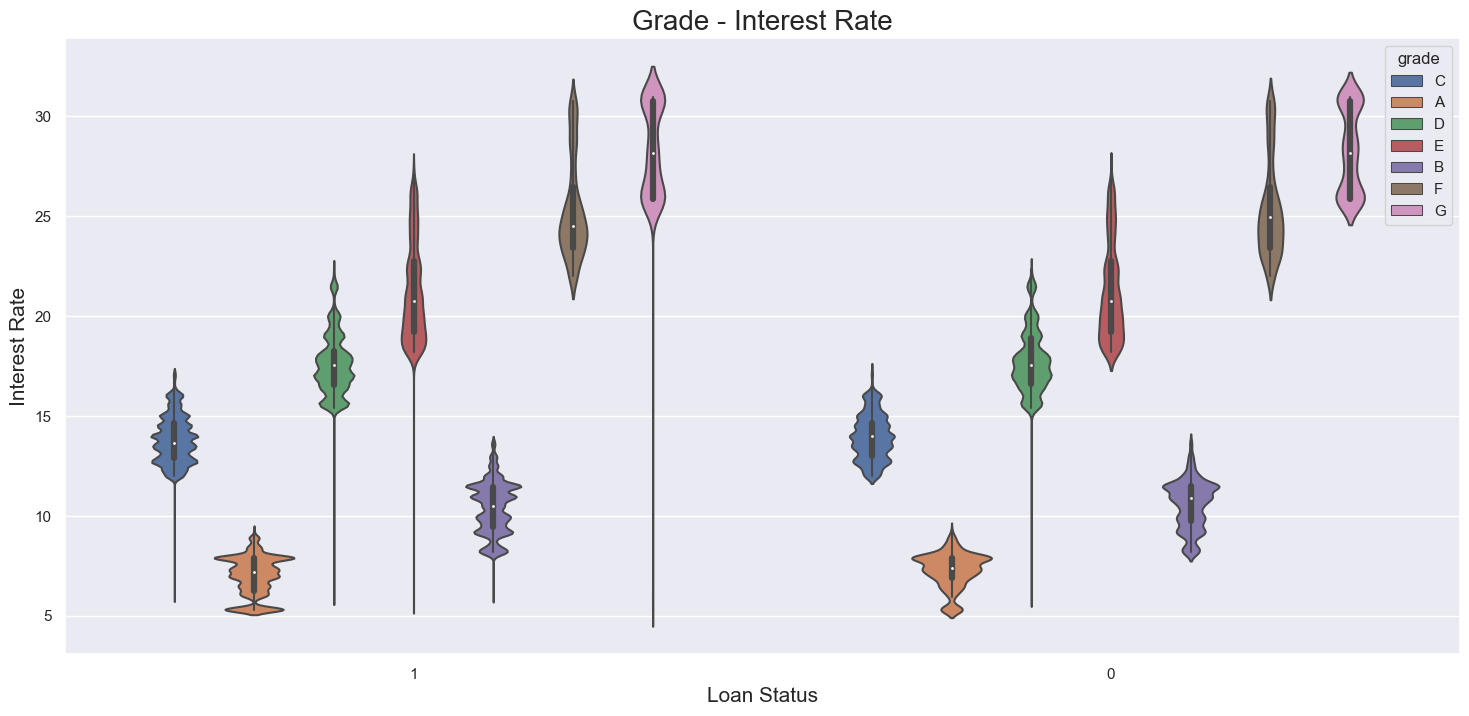

In [73]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="loan_status",y="int_rate",data=data, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

### Statistical Test

The p-value associated with the chi-square statistic is approximately 
This extremely small p-value suggests strong evidence against the null hypothesis, indicating that there is a significant association between the two categorical variables.

In [74]:
from scipy.stats import chi2_contingency

# Assuming 'variable1' and 'variable2' are your categorical variables
# Create a contingency table
contingency_table = pd.crosstab(data['sector'], data['loan_status'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 215.63657817597385
p-value: 1.6285979890455736e-45
Degrees of freedom: 4
Expected frequencies table:
[[ 5018.00977905 22398.99022095]
 [ 3920.0398821  17497.9601179 ]
 [ 5225.74370687 23326.25629313]
 [ 7193.2676929  32108.7323071 ]
 [ 5406.93893908 24135.06106092]]
